<a href="https://colab.research.google.com/github/ssyss-513/MyColab/blob/main/5102assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5102 assignment1 2025-10-5

In [1]:
import numpy as np
from scipy.stats import geom, chi2

# -----------------------------
# (1) Geometric Distribution
# -----------------------------
p = 0.2  # success probability

P_K_eq_4 = geom.pmf(4, p)
P_K_le_3 = geom.cdf(3, p)
quantile_07 = geom.ppf(0.7, p)
samples_geom = geom.rvs(p, size=100, random_state=5102)

print("=== Geometric Distribution (p=0.2) ===")
print("P(K = 4) =", P_K_eq_4)
print("P(K ≤ 3) =", P_K_le_3)
print("0.7 quantile =", quantile_07)
print("First 10 random samples:", samples_geom[:10], "\n")

# -----------------------------
# (2) Chi-square Distribution
# -----------------------------
df = 4  # degrees of freedom

density_x2 = chi2.pdf(2, df)
P_X_le_3 = chi2.cdf(3, df)
x_for_0_9 = chi2.ppf(0.9, df)
samples_chi2 = chi2.rvs(df, size=100, random_state=5102)

print("=== Chi-square Distribution (df=4) ===")
print("Density at x=2:", density_x2)
print("P(X ≤ 3) =", P_X_le_3)
print("x for P(X ≤ x) = 0.9:", x_for_0_9)
print("First 10 random samples:", samples_chi2[:10])


=== Geometric Distribution (p=0.2) ===
P(K = 4) = 0.10240000000000003
P(K ≤ 3) = 0.48800000000000004
0.7 quantile = 6.0
First 10 random samples: [ 3  4  5 10  1  5  1  2  1  4] 

=== Chi-square Distribution (df=4) ===
Density at x=2: 0.18393972058572114
P(X ≤ 3) = 0.4421745996289252
x for P(X ≤ x) = 0.9: 7.779440339734858
First 10 random samples: [7.82932614 0.42821481 3.80299977 1.96869378 3.34696078 1.22048759
 4.31558593 1.65599799 4.96724188 2.8715342 ]


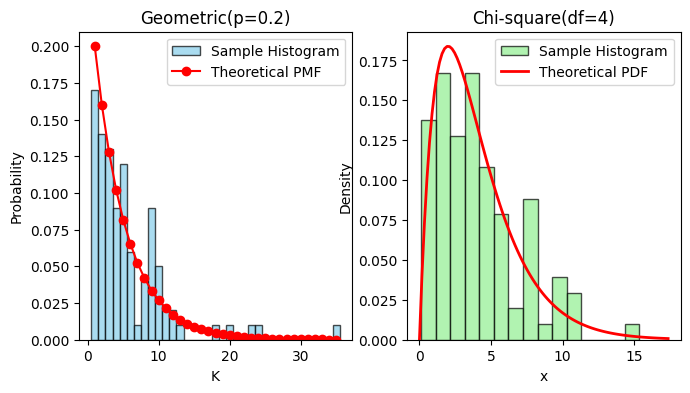

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import geom, chi2, poisson

plt.rcParams['figure.figsize'] = (12, 4)

# ====================================
# 1️⃣ Geometric Distribution
# ====================================
p = 0.2
samples_geom = geom.rvs(p, size=100, random_state=5102)

x_vals = np.arange(1, np.max(samples_geom)+1)
pmf_vals = geom.pmf(x_vals, p)

plt.subplot(1, 3, 1)
plt.hist(samples_geom, bins=np.arange(1, np.max(samples_geom)+2)-0.5,
         density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Sample Histogram')
plt.plot(x_vals, pmf_vals, 'r-o', label='Theoretical PMF')
plt.title('Geometric(p=0.2)')
plt.xlabel('K')
plt.ylabel('Probability')
plt.legend()

# ====================================
# 2️⃣ Chi-square Distribution
# ====================================
df = 4
samples_chi2 = chi2.rvs(df, size=100, random_state=5102)
x = np.linspace(0, max(samples_chi2)+2, 100)
pdf_vals = chi2.pdf(x, df)

plt.subplot(1, 3, 2)
plt.hist(samples_chi2, bins=15, density=True, color='lightgreen',
         edgecolor='black', alpha=0.7, label='Sample Histogram')
plt.plot(x, pdf_vals, 'r-', linewidth=2, label='Theoretical PDF')
plt.title('Chi-square(df=4)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

In [3]:
import numpy as np
from scipy.stats import poisson

# Set random seed
np.random.seed(5102)

# True parameter
lam_true = 3

# Generate 100 random samples
samples = poisson.rvs(mu=lam_true, size=100, random_state=5102)

# MLE estimation (sample mean)
lam_hat = np.mean(samples)

print("=== Poisson Distribution (λ = 3) ===")
print("Generated 100 samples:", samples[:15], "...")
print("True λ =", lam_true)
print("Estimated λ (MLE) =", lam_hat)
print("Difference =", lam_hat - lam_true)


=== Poisson Distribution (λ = 3) ===
Generated 100 samples: [4 2 3 2 6 2 5 5 3 2 4 6 0 4 4] ...
True λ = 3
Estimated λ (MLE) = 3.1
Difference = 0.10000000000000009


# Q3

\[$
X_{11}, \dots, X_{1n_1} \sim N(\mu_1, \sigma_1^2), \quad n_1 = 50,
$\]

\[$
X_{21}, \dots, X_{2n_2} \sim N(\mu_2, \sigma_2^2), \quad n_2 = 30,
$\]

with parameters $\mu_1=15$, $\sigma_1^2=10$, $\mu_2=20$, $\sigma_2^2=10$.  
Random seed = 5102.


# (b) Known variance $\sigma_1^2=10$, unknown $\mu_1$ (99\% CI)

\[$
\mu_1 \in
\left[
\bar X_1 - z_{0.995}\frac{\sigma_1}{\sqrt{n_1}},
\;
\bar X_1 + z_{0.995}\frac{\sigma_1}{\sqrt{n_1}}
\right].
$\]

In [4]:
import numpy as np
from scipy import stats

np.random.seed(5102)
mu1, sigma1_sq = 15, 10
mu2, sigma2_sq = 20, 10
n1, n2 = 50, 30

data1 = np.random.normal(mu1, np.sqrt(sigma1_sq), n1)
data2 = np.random.normal(mu2, np.sqrt(sigma2_sq), n2)

# b. Known variance σ1²=10, CI for µ1 (99%)
z = stats.norm.ppf(1 - 0.005)
mu1_hat = np.mean(data1)
ci_mu1_known = (
    mu1_hat - z * np.sqrt(sigma1_sq/n1),
    mu1_hat + z * np.sqrt(sigma1_sq/n1)
)



print("b) 99% CI for µ1 (known σ1²):", [f"{x:.4f}" for x in ci_mu1_known])

b) 99% CI for µ1 (known σ1²): ['13.8776', '16.1815']


# (c) Unknown $\sigma_1^2$, unknown $\mu_1$ (99\% CI)

\[$
\mu_1 \in
\left[
\bar X_1 - t_{49,0.995}\frac{S_1}{\sqrt{n_1}},
\;
\bar X_1 + t_{49,0.995}\frac{S_1}{\sqrt{n_1}}
\right].
$\]

Using $t_{49,0.995}=2.68$, $S_1\approx2.54$, we get:

\[$
\boxed{\mu_1 \in (14.07,\, 15.99)}
$\]

In [5]:
# c. Unknown variance σ1², CI for µ1 (99%)
t = stats.t.ppf(1 - 0.005, df=n1-1)
s1 = np.std(data1, ddof=1)
ci_mu1_unknown = (
    mu1_hat - t * s1/np.sqrt(n1),
    mu1_hat + t * s1/np.sqrt(n1)
)
print("c) 99% CI for µ1 (unknown σ1²):", [f"{x:.4f}" for x in ci_mu1_unknown])


c) 99% CI for µ1 (unknown σ1²): ['14.0655', '15.9937']


# (d) Known $\sigma_1^2=\sigma_2^2=10$, CI for $\mu_1-\mu_2$ (95\%)

\[$
\mu_1 - \mu_2 \in
\left[
(\bar X_1 - \bar X_2) - z_{0.975}\sqrt{\frac{10}{n_1}+\frac{10}{n_2}},
\;
(\bar X_1 - \bar X_2) + z_{0.975}\sqrt{\frac{10}{n_1}+\frac{10}{n_2}}
\right]
$\]

In [6]:
# d. Known σ1²=σ2²=10, CI for µ1-µ2 (95%)
z = stats.norm.ppf(1 - 0.025)
diff_mean = np.mean(data1) - np.mean(data2)
ci_diff_known = (
    diff_mean - z * np.sqrt(10/n1 + 10/n2),
    diff_mean + z * np.sqrt(10/n1 + 10/n2)
)
print("d) 95% CI for µ1 - µ2 (known σ):", [f"{x:.4f}" for x in ci_diff_known])


d) 95% CI for µ1 - µ2 (known σ): ['-6.0894', '-3.2267']


# (e) Equal but unknown variances (99\%)

\[$
\mu_1 - \mu_2 \in
\left[
(\bar X_1-\bar X_2) - t_{78,0.995}S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}},
\;
(\bar X_1-\bar X_2) + t_{78,0.995}S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}
\right]
$\]

In [7]:
# e. Unknown but equal variance, CI for µ1-µ2 (99%)
t = stats.t.ppf(1 - 0.005, df=n1 + n2 - 2)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*np.var(data2, ddof=1)) / (n1+n2-2))
ci_diff_unknown = (
    diff_mean - t * s_pooled * np.sqrt(1/n1 + 1/n2),
    diff_mean + t * s_pooled * np.sqrt(1/n1 + 1/n2)
)
print("e) 99% CI for µ1 - µ2 (unknown but equal σ):", [f"{x:.4f}" for x in ci_diff_unknown])

e) 99% CI for µ1 - µ2 (unknown but equal σ): ['-6.5655', '-2.7507']


\[$
\sigma_1^2 \in
\left[
\frac{\sum (X_{1i}-\mu_0)^2}{\chi^2_{n_1,0.975}},
\;
\frac{\sum (X_{1i}-\mu_0)^2}{\chi^2_{n_1,0.025}}
\right]
$\]

In [8]:
import numpy as np
from scipy import stats

data1 = np.random.normal(mu1, np.sqrt(sigma1_sq), n1)

# ---- (f) Known mean μ1=5, unknown variance ----
mu0 = 5
alpha = 0.05
df = n1

sum_sq = np.sum((data1 - mu0)**2)

chi2_lower = stats.chi2.ppf(1 - alpha/2, df)
chi2_upper = stats.chi2.ppf(alpha/2, df)

ci_sigma2_known_mu = (
    sum_sq / chi2_lower,
    sum_sq / chi2_upper
)

print("Q3(f): 95% CI for σ₁² (known μ₁=5):", [f"{x:.4f}" for x in ci_sigma2_known_mu])


Q3(f): 95% CI for σ₁² (known μ₁=5): ['77.0878', '170.1506']


\[$
\sigma_1^2 \in
\left[
\frac{(n_1-1)S_1^2}{\chi^2_{49,0.975}},
\;
\frac{(n_1-1)S_1^2}{\chi^2_{49,0.025}}
\right]
$\]

In [9]:
# ---- (g) Both μ1 and σ1² unknown ----
df = n1 - 1
s1_sq = np.var(data1, ddof=1)

chi2_lower = stats.chi2.ppf(1 - alpha/2, df)
chi2_upper = stats.chi2.ppf(alpha/2, df)

ci_sigma2_unknown = (
    (df * s1_sq) / chi2_lower,
    (df * s1_sq) / chi2_upper
)

print("Q3(g): 95% CI for σ₁² (unknown μ₁, σ₁²):",[f"{x:.4f}" for x in ci_sigma2_unknown])


Q3(g): 95% CI for σ₁² (unknown μ₁, σ₁²): ['9.9036', '22.0395']
